# Linear Regression Exercise `Python`

This exercise is going to be a little different in the sense that we won't be guiding in a question-by-question format. Instead, we are going to let you construct a linear model in your choice of `R` or `Python`, whichever you prefer.

The prediction problem is to predict `height` from the `'/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv'` dataset. You can use any variable or combination of variables in order to predict `height`.

You are not going to be graded upon the performance of the model itself, but please approach this as an actual prediction problem. That being said, you should split the data into training and testing sets, in which your model is trained on your training set while the performance is assessed on the testing set. Be sure to predict some output with your testing inputs.

The purpose of this assignment is to demonstrate your ability to use regression to develop a machine learning model. Feel free to include anything that demonstrates your understanding of model development and model refinement including data exploration and even a written description of your reasoning. 

Like always, feel free to ask questions along the way if you get stuck at any point. We are more than happy to help!

To add execution cells, click in this cell.
Then, in the notebook menu: `Insert > Insert Cell Below`

<span style="color:blue">First, I want to load my libraries and data. Then get a preliminary look at the data.</span>

In [1]:
!pip install scikit-misc
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection
from sklearn import linear_model
from scipy.stats import pearsonr
from scipy.stats import linregress
import plotnine
from plotnine import *

with open('/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv') as file:
    df = pd.read_csv(file)

In [2]:
df.head()

,gender,height,hand length,foot length
0,1,1760.2,208.6,269.6
1,1,1730.1,207.6,251.3
2,1,1659.6,173.2,193.6
3,1,1751.3,258.0,223.8
4,1,1780.6,212.3,282.1


<span style="color:blue">I don't like the two-word column names and I'm not even sure how one would work with them.</span>

In [3]:
df = df.rename(columns = {'hand length': 'hand_length', 'foot length': 'foot_length'})
#df = df.rename(columns = {'foot length': 'foot_length'})
#df = df.rename({'foot length': 'foot_length'}, axis = 1)
#pd.DataFrame.rename(columns = {"foot length" : "foot_length"})
#pd.DataFrame.set_axis(['gender', 'height', 'hand_length', 'foot_length',2], axis=1)
#df.rename({'foot length' : 'foot_length'}, axis=1)
#pd.DataFrame.columns = ['gender', 'height', 'hand_length', 'foot_length']
df.columns = ['gender', 'height', 'hand_length', 'foot_length']

df.head()

,gender,height,hand_length,foot_length
0,1,1760.2,208.6,269.6
1,1,1730.1,207.6,251.3
2,1,1659.6,173.2,193.6
3,1,1751.3,258.0,223.8
4,1,1780.6,212.3,282.1


<span style="color:blue">It was a struggle to rename 'foot length' for some reason. Now the column names are easier to work with and I know the basics about the data, I want to dig into it a little more before creating my model.</span>

In [4]:
df.describe()

,gender,height,hand_length,foot_length
count,155.000000,155.000000,155.000000,155.000000
mean,1.483871,1677.516129,199.489032,249.101290
std,0.501360,93.913089,13.342222,18.548672
min,1.000000,1485.300000,133.700000,193.600000
25%,1.000000,1604.450000,189.550000,232.900000
50%,1.000000,1669.500000,200.000000,251.400000
75%,2.000000,1750.550000,208.650000,263.150000
max,2.000000,1888.700000,258.000000,283.100000


<span style="color:blue">Need to check to see if there was a need to do some carpentry or if this data set is ready to be analyzed.</span>

In [5]:
df.isna().sum().sum()

0

In [6]:
df.dtypes

gender           int64
height         float64
hand_length    float64
foot_length    float64
dtype: object

<span style="color:blue">Since there are no NaNs, gender is already a numerical value, and all of the measurement fields are already floats I will move onto some more detailed data exploration.</span>

---

<span style="color:blue">I'll start with looking at some statistical data.</span>

In [7]:
hMean = df.groupby(['gender'])['height'].mean()
hlMean = df.groupby(['gender'])['hand_length'].mean()
flMean = df.groupby(['gender'])['foot_length'].mean()

hMedian = df.groupby(['gender'])['height'].median()
hlMedian = df.groupby(['gender'])['hand_length'].median()
flMedian = df.groupby(['gender'])['foot_length'].median()

hStDev = df.groupby(['gender'])['height'].std()
hlStDev = df.groupby(['gender'])['hand_length'].std()
flStDev = df.groupby(['gender'])['foot_length'].std()

print("Height mean by", hMean, "\n\n", "Hand length mean by", hlMean, "\n\n", "Foot length mean by", flMean, "\n\n")
print("Height median by", hMedian, "\n\n", "Hand length median by", hlMedian, "\n\n", "Foot length median by", flMedian, "\n\n")
print("Height standard deviation by", hStDev, "\n\n", "Hand length standard deviation by", hlStDev, "\n\n", "Foot length standard deviation by", flStDev)

Height mean by gender
1    1750.565000
2    1599.597333
Name: height, dtype: float64 

 Hand length mean by gender
1    208.77875
2    189.58000
Name: hand_length, dtype: float64 

 Foot length mean by gender
1    262.556250
2    234.749333
Name: foot_length, dtype: float64 


Height median by gender
1    1749.1
2    1597.2
Name: height, dtype: float64 

 Hand length median by gender
1    208.3
2    189.5
Name: hand_length, dtype: float64 

 Foot length median by gender
1    262.7
2    233.0
Name: foot_length, dtype: float64 


Height standard deviation by gender
1    61.273696
2    49.235328
Name: height, dtype: float64 

 Hand length standard deviation by gender
1    9.207684
2    9.334968
Name: hand_length, dtype: float64 

 Foot length standard deviation by gender
1    12.423241
2    12.114492
Name: foot_length, dtype: float64


<span style="color:blue">The mean and median are pretty close in this data set, so the distribution is fairly symmetrical.</span>

 ---

<span style="color:blue">Next I want to visualize the data a bit more.</span>

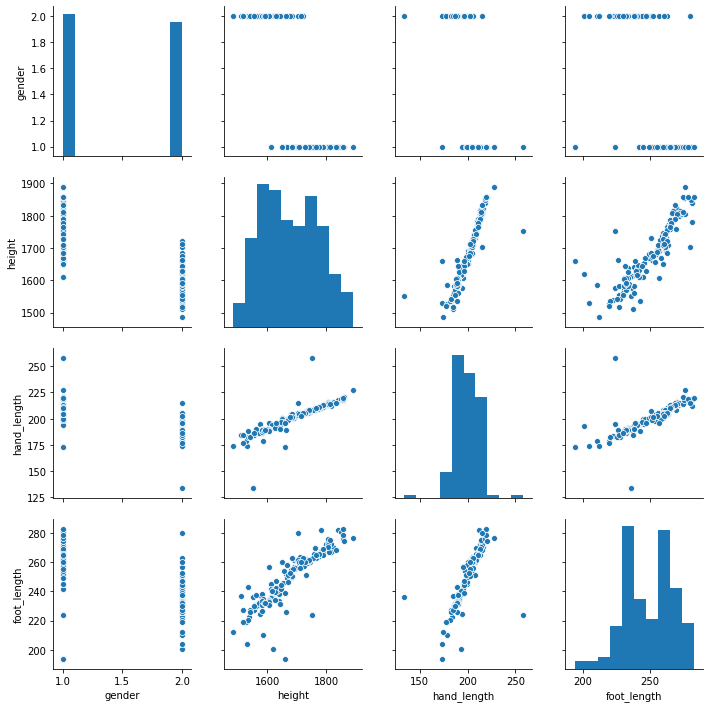

In [8]:
sns.pairplot(df[['gender', 'height', 'hand_length', 'foot_length']])

<span style="color:blue">I guess it really isn't a surprise to see plotting gender is not neccessarily useful. Distributions look fairly normal and all of the measurements seem to be linearly correlated. I want to see some larger graphs though.</span>

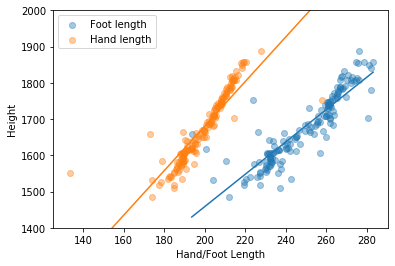

In [9]:
g = df.gender
h = df.height
hl = df.hand_length
fl = df.foot_length

plt.scatter(fl, h, alpha = 0.4, label = "Foot length")
plt.plot(np.unique(fl), np.poly1d(np.polyfit(fl, h, 1))(np.unique(fl)))

plt.scatter(hl, h, alpha = 0.4, label = "Hand length")
plt.plot(np.unique(hl), np.poly1d(np.polyfit(hl, h, 1))(np.unique(hl)))

plt.xlabel('Hand/Foot Length')
plt.ylabel('Height')
plt.legend()
plt.axis((None, None, 1400, 2000))

plt.show()

<span style="color:blue">There are a few outliers for both lenghts, but hand length's outliers stretch across a broad spectrum.</span>
    
 ---

<span style="color:blue">Next I want to get a feel for the data set's distributions.</span>

In [10]:
histH, binEdgesH = np.histogram(h)

print("Height histogram: ", histH)
print("Height bin edges: ", binEdgesH)
print("Height histogram size: ", histH.size)
print("Height bin edges size: ", binEdgesH.size, "\n")

histHL, binEdgesHL = np.histogram(hl)

print("Hand length histogram: ", histHL)
print("Hand length bin edges: ", binEdgesHL)
print("Hand length histogram size: ", histHL.size)
print("Hand length bin edges size: ", binEdgesHL.size, "\n")

histFL, binEdgesFL = np.histogram(fl)

print("Foot length histogram: ", histFL)
print("Foot length bin edges: ", binEdgesFL)
print("Foot length histogram size: ", histFL.size)
print("Foot length bin edges size: ", binEdgesFL.size)


Height histogram:  [ 4 15 24 23 18 17 22 17  9  6]
Height bin edges:  [1485.3  1525.64 1565.98 1606.32 1646.66 1687.   1727.34 1767.68 1808.02
 1848.36 1888.7 ]
Height histogram size:  10
Height bin edges size:  11 

Hand length histogram:  [ 1  0  0 10 55 48 39  1  0  1]
Hand length bin edges:  [133.7  146.13 158.56 170.99 183.42 195.85 208.28 220.71 233.14 245.57
 258.  ]
Hand length histogram size:  10
Hand length bin edges size:  11 

Foot length histogram:  [ 2  2  3 11 37 18 13 36 21 12]
Foot length bin edges:  [193.6  202.55 211.5  220.45 229.4  238.35 247.3  256.25 265.2  274.15
 283.1 ]
Foot length histogram size:  10
Foot length bin edges size:  11


<span style="color:blue">Now I want a better look at the distributions.</span>

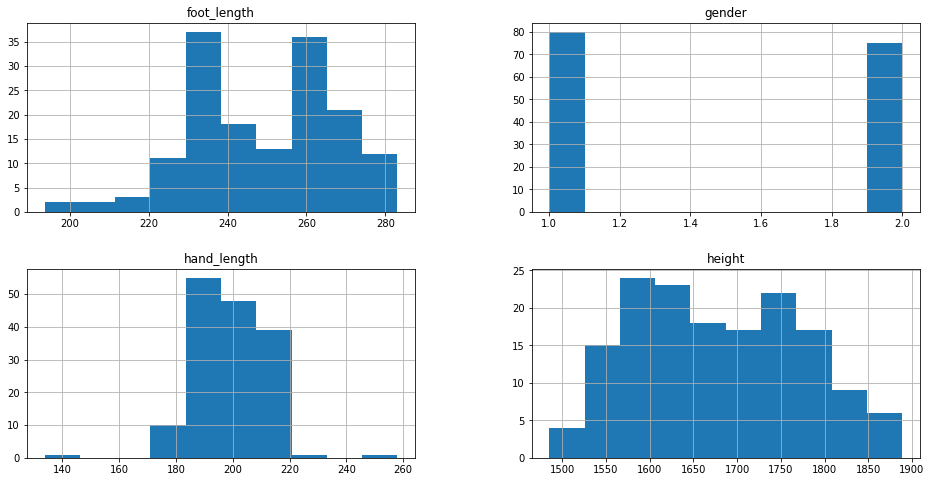

In [11]:
histograms = df.hist(figsize = (16, 8))

<span style="color:blue">It looks like hand length is pretty normally distributed, as is height. Foot length and to a lesser degree height also seem to have double peaks. Could be related to gender.</span>
    
 ---

<span style="color:blue">Now I want histograms that plot measurements by gender. I decided to set the y-axis height to be the same for all three to view them at the same scale</span>

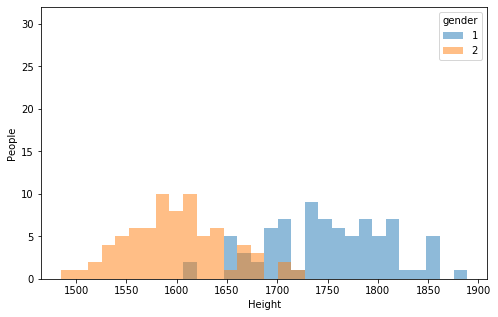

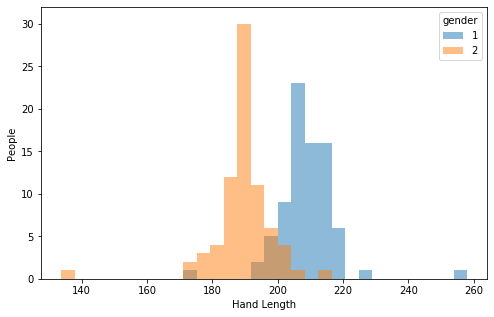

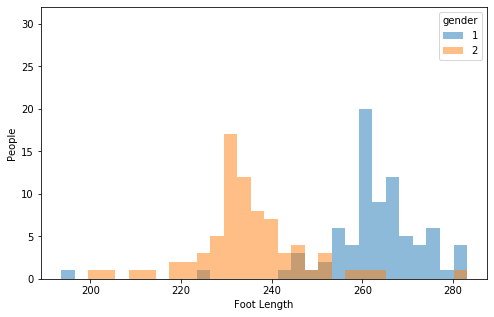

In [12]:
df.pivot(columns="gender", values="height").plot.hist(bins = 30, alpha = 0.5, figsize = (8, 5))
plt.xlabel('Height')
plt.ylabel('People')
plt.axis((None, None, 0, 32))

df.pivot(columns="gender", values="hand_length").plot.hist(bins = 30, alpha = 0.5, figsize = (8, 5))
plt.xlabel('Hand Length')
plt.ylabel('People')
plt.axis((None, None, 0, 32))

df.pivot(columns="gender", values="foot_length").plot.hist(bins = 30, alpha = 0.5, figsize = (8, 5))
plt.xlabel('Foot Length')
plt.ylabel('People')
plt.axis((None, None, 0, 32))

plt.show()

<span style="color:blue">Looks like gender should be correlated with all three measurements, and as such may not need to be included in the model as an input.</span>
    
 ---

<span style="color:blue">Nex I wanted to calculate the correlation coeeficients and covariances.</span>

In [13]:
df.corr()

,gender,height,hand_length,foot_length
gender,1.000000,-0.805948,-0.721430,-0.751605
height,-0.805948,1.000000,0.873295,0.881280
hand_length,-0.721430,0.873295,1.000000,0.788224
foot_length,-0.751605,0.881280,0.788224,1.000000


In [14]:
df.cov()

,gender,height,hand_length,foot_length
gender,0.251362,-37.947465,-4.825827,-6.989589
height,-37.947465,8819.668245,1094.247191,1535.156408
hand_length,-4.825827,1094.247191,178.014879,195.070144
foot_length,-6.989589,1535.156408,195.070144,344.053245


In [15]:
female =  df[(df['gender'] == 2)]
female = female.drop(['gender'], axis = 1)
male =  df[(df['gender'] == 1)]
male = male.drop(['gender'], axis = 1)

female.corr()

,height,hand_length,foot_length
height,1.000000,0.709244,0.699100
hand_length,0.709244,1.000000,0.609538
foot_length,0.699100,0.609538,1.000000


In [16]:
female.cov()

,height,hand_length,foot_length
height,2424.117560,325.975892,416.985944
hand_length,325.975892,87.141622,68.931676
foot_length,416.985944,68.931676,146.760912


In [17]:
male.corr()

,height,hand_length,foot_length
height,1.000000,0.722356,0.715975
hand_length,0.722356,1.000000,0.473000
foot_length,0.715975,0.473000,1.000000


In [18]:
male.cov()

,height,hand_length,foot_length
height,3754.465848,407.545449,545.012880
hand_length,407.545449,84.781441,54.106147
foot_length,545.012880,54.106147,154.336922


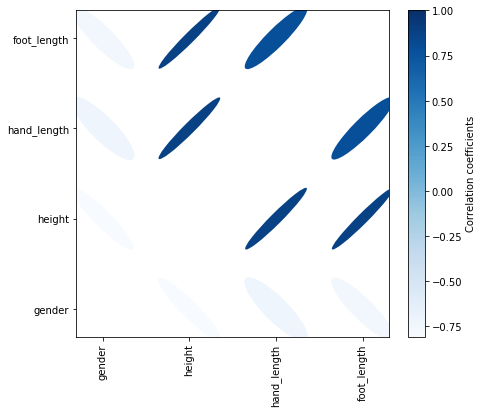

In [19]:
def plot_corr_ellipses(df, ax = None, **kwargs):

    M = np.array(df)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles = a, units = 'x', offsets = xy,
                           transOffset=ax.transData, array = M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(df, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(df.columns, rotation = 90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(df.index)

    return ec

fig, ax = plt.subplots(1, 1, figsize = (7, 6))
m = plot_corr_ellipses(df.corr(), ax = ax, cmap = 'Blues')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficients')
ax.margins(0.1)

<span style="color:blue">It appears the strogest correlations in our dataset are between foot length and hand length.</span>

In [20]:
print("Gender", linregress(g, h), "\n")
print("Hand length", linregress(hl, h), "\n")
print("Foot length", linregress(fl, h))

Gender LinregressResult(slope=-150.96766666666673, intercept=1901.5326666666667, rvalue=-0.8059483931583068, pvalue=1.160662194708788e-36, stderr=8.964834636041049) 

Hand length LinregressResult(slope=6.146942309694665, intercept=451.2685563251175, rvalue=0.8732953831482183, pvalue=1.215784378606515e-49, stderr=0.27723726703010154) 

Foot length LinregressResult(slope=4.461973341593729, intercept=566.0328122563033, rvalue=0.8812795161569845, pvalue=1.1477869028095023e-51, stderr=0.1934448055463997)


<span style="color:blue">When thinking about predicting height, gender has a negative covariance, which tells us the smaller number (male) has taller heights and the larger number (female) is tied to smaller heights. Both of the measures have positive covariance. This means larger hands/feet mean taller heights.</span>

<span style="color:blue">All of the potential inputs have a strong correlation with hand and foot length both approaching a very strong correlation.</span>
    
<span style="color:blue">The slopes tell me to expect males to be about 151 cm taller, for each centimeter longer the hand to expect about 6 cm added height, and for each centimeter longer the foot to expect about 4.5 cm added height.</span>
    
 ---

<span style="color:blue">I think to be as accurate as possible, my model needs to account for gender, hand length, and foot length.</span>

In [21]:
# When creating my training and testing sets I'm going to use the same 70/30 split we used in the practice.
train = df.sample(frac = 7/10, random_state = 1)
test = df.drop(train.index)

<span style="color:blue">Since all three variables had a correlation coefficient $\ge$ 0.8, and the slope for gender was so large I decided to use them all as inputs and of course height as the outcome.</span>

In [22]:
train_X = np.asarray(train[['gender', 'hand_length', 'foot_length']])
train_y = np.asarray(train.height)

test_X = np.asarray(test[['gender', 'hand_length', 'foot_length']])
test_y = np.asarray(test.height)

<span style="color:blue">Now to create and train the model</span>

In [23]:
regrModel = linear_model.LinearRegression()

regrModel.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<span style="color:blue">I want to see results from training the model.</span>

In [25]:
print("Intercept: ", regrModel.intercept_, "\n")

z = zip(['gender', 'hand_length', 'foot_length'],regrModel.coef_)
print("Coefficients: ", list(z), "\n")

print('Training R-Squared: {}'.format(regrModel.score(train_X, train_y)))

print('Testing R-Squared: {}'.format(regrModel.score(test_X, test_y)))

Intercept:  714.8945738470037 

Coefficients:  [('gender', -44.196827350420946), ('hand_length', 3.3865318743429826), ('foot_length', 1.4188517992305183)] 

Training R-Squared: 0.8623523993502923
Testing R-Squared: 0.8920066395220825


<span style="color:blue">It is good to see the training model accounts for 86.24% of the variance and the testing model did even better accounting for 89.2% of the variance.</span>
    
 ---

<span style="color:blue">I want to play with a few models to see if one or more changes would make for a better model.</span>

In [26]:
# Gender-only set & model
train_X1 = np.asarray(train[['gender']])
train_y1 = np.asarray(train.height)

test_X1 = np.asarray(test[['gender']])
test_y1 = np.asarray(test.height)

regrModel1 = linear_model.LinearRegression()
regrModel1.fit(train_X1, train_y1)

# Hand length-only set & model
train_X2 = np.asarray(train[['hand_length']])
train_y2 = np.asarray(train.height)

test_X2 = np.asarray(test[['hand_length']])
test_y2 = np.asarray(test.height)

regrModel2 = linear_model.LinearRegression()
regrModel2.fit(train_X2, train_y2)

# Foot length-only set & model
train_X3 = np.asarray(train[['foot_length']])
train_y3 = np.asarray(train.height)

test_X3 = np.asarray(test[['foot_length']])
test_y3 = np.asarray(test.height)

regrModel3 = linear_model.LinearRegression()
regrModel3.fit(train_X3, train_y3)

# Genderless set & model
train_X4 = np.asarray(train[['hand_length', 'foot_length']])
train_y4 = np.asarray(train.height)

test_X4 = np.asarray(test[['hand_length', 'foot_length']])
test_y4 = np.asarray(test.height)

regrModel4 = linear_model.LinearRegression()
regrModel4.fit(train_X4, train_y4)

print("Gender Model:")
print("Intercept: ", regrModel1.intercept_)
z1 = zip(['gender'],regrModel1.coef_)
print("Coefficient: ", list(z1))
print('Training R-Squared: {}'.format(regrModel1.score(train_X1, train_y1)))
print('Testing R-Squared: {}'.format(regrModel1.score(test_X1, test_y1)), "\n")
print("Hand Length Model:")
print("Intercept: ", regrModel2.intercept_)
z2 = zip(['hand_length'],regrModel2.coef_)
print("Coefficient: ", list(z2))
print('Training R-Squared: {}'.format(regrModel2.score(train_X2, train_y2)))
print('Testing R-Squared: {}'.format(regrModel2.score(test_X2, test_y2)), "\n")
print("Foot Length Model:")
print("Intercept: ", regrModel3.intercept_)
z3 = zip(['foot_length'],regrModel3.coef_)
print("Coefficient: ", list(z3))
print('Training R-Squared: {}'.format(regrModel3.score(train_X3, train_y3)))
print('Testing R-Squared: {}'.format(regrModel3.score(test_X3, test_y3)), "\n")
print("Hand & Foot Length Model:")
print("Intercept: ", regrModel4.intercept_)
z4 = zip(['hand_length', 'foot_length'],regrModel4.coef_)
print("Coefficients: ", list(z4))
print('Training R-Squared: {}'.format(regrModel4.score(train_X4, train_y4)))
print('Testing R-Squared: {}'.format(regrModel4.score(test_X4, test_y4)))

Gender Model:
Intercept:  1896.2655574614064
Coefficient:  [('gender', -149.93914236706695)]
Training R-Squared: 0.6452104215580466
Testing R-Squared: 0.6363778234166814 

Hand Length Model:
Intercept:  404.7981350319485
Coefficient:  [('hand_length', 6.389181723310665)]
Training R-Squared: 0.7952387285269256
Testing R-Squared: 0.6680203060425792 

Foot Length Model:
Intercept:  596.0812078723122
Coefficient:  [('foot_length', 4.338695155520276)]
Training R-Squared: 0.7664828823951768
Testing R-Squared: 0.7871216037288542 

Hand & Foot Length Model:
Intercept:  401.8417889700286
Coefficients:  [('hand_length', 3.8195968667022324), ('foot_length', 2.0676793356014302)]
Training R-Squared: 0.84069215785758
Testing R-Squared: 0.887522333517272


<span style="color:blue">None of the inputs alone outperformed the original model, though foot and hand lengths came very close. The prediction probably wouldn't suffer much leaving gender out.</span>
    
 ---

<span style="color:blue">Finally, it is time to predict height.</span>

In [27]:
fullModel = regrModel.predict(test_X)
genderlessModel = regrModel4.predict(test_X4)

print("Full model predictions:", fullModel, "\n")
print("Hand & Foot length model predictions:", genderlessModel)

Full model predictions: [1730.29922076 1861.96200274 1705.69665995 1786.86742279 1810.23574723
 1792.86277073 1764.19916803 1699.83384097 1768.35936486 1760.21297591
 1716.17745082 1769.45297055 1729.15198674 1771.59465533 1736.23688951
 1745.95211715 1754.36886938 1800.08425332 1749.34800525 1690.54301437
 1736.13117472 1748.11251438 1807.15979988 1747.48073461 1735.13797846
 1815.71843728 1732.48363579 1584.79580025 1751.09670388 1575.31756186
 1607.57382066 1594.31956524 1622.37415147 1589.08852603 1629.52734416
 1582.25122323 1604.01733494 1568.00907691 1667.0922883  1623.42223056
 1602.48871749 1599.70589672 1601.66952593 1681.06532585 1641.00133129
 1598.05410652 1595.39040763] 

Hand & Foot length model predictions: [1714.39791553 1850.04441589 1687.02312282 1789.13683037 1818.95212554
 1796.64667386 1759.78395809 1679.14863049 1765.17723521 1754.86736919
 1701.18111636 1765.99004162 1717.07676211 1768.21864738 1726.84374202
 1736.53939528 1748.13571041 1804.60467492 1740.930408

<span style="color:blue">There are definitely differences between the two predictions, but they are not very far apart. If I were in a situation where computer time was at a premium and this dataset fell into the <i>Big Data</i> category necessitating I only use two inputs, I would feel comfortable picking any two of these three, but hand & foot length do seem to be good predictors by themselves.</span>

# Save your notebook, then `File > Close and Halt`